# Data Cleaning in R and Python: Side-by-side Tutorial

Data cleaning is one of the most crucial steps in the analysis process. In fact, data scientists often spend a majority of their time just getting the data ready to build a model.

*So do we do this in Python or R?*
Good question! This tutorial will walk you through some basic data cleaning tasks in Python and then R. They each have their own strengths, and it's up to you to decide what works best for your project. 

## About the Data: 
<Br>
This data is an Olympics dataset that has information about atheletes, their events, and the Olympic Games for each year since 1961. We will combine this dataset with a GDP dataset to see if GDP is a predicting factor in how many Olympic medals a country wins. We will perform this analysis for the 2016 Olympics in Rio de Janeiro. 

![title](rio.jpg)

### Packages

In Python: 

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In R:

![title](Screen_Shots/read_data.png)

# Read in Data

In Python: 

In [23]:
olympics = pd.read_csv("athlete_events.csv")
pop = pd.read_csv("world_pop.csv")
gdp = pd.read_csv("world_gdp.csv", skiprows=3)

In R:

![title](Screen_Shots/read_data.png)

# Rename column

In Python: 

In [24]:
olympics.rename(columns={'NOC':'Country Code'}, inplace=True)
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In R:

![title](Screen_Shots/rename_column.png)

In Python: We also need to drop these two columns in Python 

In [25]:
gdp=gdp.drop(["Indicator Name", "Indicator Code"],axis=1)
gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,...,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


# Melt

In Python: 

In [26]:
# to get ready for merging with GDP, create a column for each year and GDP. make the data long
gdp2 = pd.melt(frame=gdp,id_vars=['Country Name', 'Country Code'], var_name="Year", value_name="GDP")

In [27]:
gdp2.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [28]:
gdp2["Year"] = gdp2["Year"].astype(int)

# Merge with GDP

In Python: 

In [29]:
mm = pd.merge(olympics,gdp2,left_on=["Country Code","Year"],right_on=["Country Code", "Year"], how='left')

In [30]:
# change value to 
mm.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,4.269160e+11
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,8.560550e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,NaN


# String Split

In [31]:
# find all of the first names


# Filter to look at most recent olympics

In Python: 

In [32]:
recent = mm[(mm['Year']==2016)]
recent.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,1.875920e+11
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,1.237260e+12
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,1.237260e+12
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,1.237260e+12
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,1.237260e+12


In [33]:
# make a 0 if no medal won, 1 if medal won to count up total number of medals

In [34]:
# replace null values with a 0 for 0 medals
recent["Medal"].fillna(0,inplace=True)
# put in a number for all of the medals earned (1=gold, 2=silver, 3=bronze)
recent["Medal"] = recent["Medal"].replace(to_replace ="Gold", value =1)
recent["Medal"] = recent["Medal"].replace(to_replace ="Silver", value =2)
recent["Medal"] = recent["Medal"].replace(to_replace ="Bronze", value =3)
recent.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,0,Romania,1.875920e+11
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,0,Spain,1.237260e+12
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,0,Spain,1.237260e+12
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,0,Spain,1.237260e+12
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,0,Spain,1.237260e+12


In [35]:
recent["Medal"].value_counts()

0    11665
3      703
1      665
2      655
Name: Medal, dtype: int64

In [38]:
recent.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,0,Romania,1.875920e+11
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,0,Spain,1.237260e+12
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,0,Spain,1.237260e+12
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,0,Spain,1.237260e+12
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,0,Spain,1.237260e+12


# Number of Medals won in 2016 by Country

In Python: 

In [45]:
medal_count = recent.groupby(['Country Code'])["Medal"].sum()
avg_age = recent.groupby(['Country Code'])["Age"].mean()
gdp = recent.groupby(['Country Code'])["GDP"].mean()

In [53]:
country = pd.concat([medal_count, avg_age, gdp], axis=1)
country = country.reset_index()
country.head()

,Country Code,Medal,Age,GDP
0,AFG,0,24.666667,1.946902e+10
1,ALB,0,23.666667,1.186387e+10
2,ALG,4,23.959459,NaN
3,AND,0,26.000000,2.858518e+09
4,ANG,0,27.461538,NaN


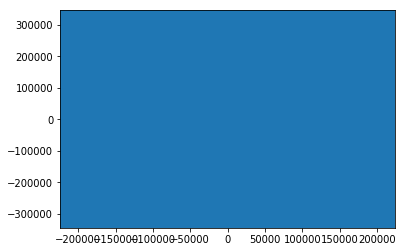

In [59]:
plt.scatter(country['Age'], country['Medal'], s=country['GDP']*1000, alpha=0.5)
plt.show()
# dang it